# Hotel Reservation Analysis
#### By Logan Parker

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [25]:
resort = pd.read_csv("H1.csv")
city = pd.read_csv("H2.csv")
length = len(resort)

In [242]:

alpha3 = pd.read_csv('wikipedia-iso-country-codes.csv')  
alpha3 = alpha3.iloc[:,2:4]
codes = dict(alpha3.values)


## Pre-Algorithmic analysis

In [30]:
resort.shape

(40060, 31)

#### As we can see there are 40,060 records with 31 attributes.

In [5]:
resort.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
resort.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,0.527758,94.952930,0.138068,0.61977
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,7.428580,61.442418,0.351001,0.81393
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.00000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.00000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.00000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,508.000000,8.000000,5.00000


### Some Notable findings from the describe function
- 27 Percent of the data represents cancellation
- The average time between book date and check-in was 92 days
- The average trip took place at the end of June
- The average Number of Adults was 2
- The average Number of Childred was 0
- Most guests are first timers and therefore a small number of people have previous cancellations
- The Average Daily rate was $95


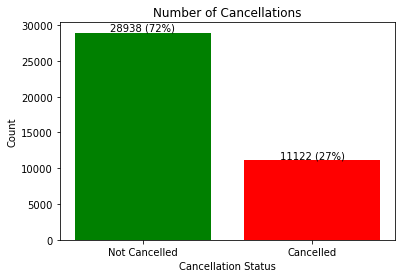

In [29]:
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.title('Number of Cancellations')
bar = plt.bar(['Not Cancelled','Cancelled'],np.array(resort.groupby(['IsCanceled']).size()), color = ["Green", "red"])
for rect in bar:
    height = rect.get_height()
    percent = height/length * 100
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d (%s%%)' % (int(height), int(percent)), ha='center', va='bottom')
plt.show()

#### Although the majority of customers do not cancel, it is the Cancelled which we are interested in. This is sort of like an anomaly detection. We want to know what are the signs and symptoms of a customer who is about to cancel

## An analysis of the coorrelation between Attributes

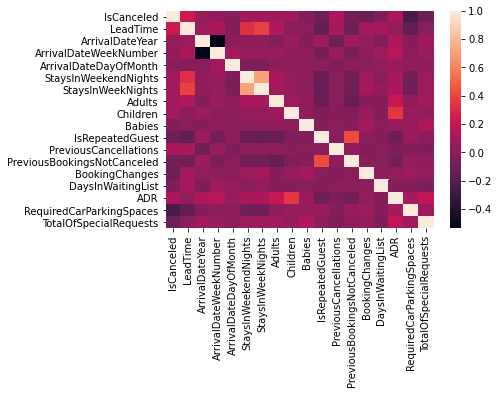

In [35]:
corrMatrix = resort.corr()
sns.heatmap(corrMatrix)
plt.show()

### This heatmap illustrates a few interesting things.
- Lead time and cancellation are fairly correlated. When people are sitting on their reservation for a long time, it leaves plenty of time to change their mind. 
- Stays in week and weekend nights are highly correlated to lead time. This makes sense because a longer stay would need to be booked further in advance
- Finally, I would like to point out that average daily rate is correlated from most to least to:
    1. Number of children
    2. Number of adults
    3. Total special requests
    4. Length of stay

## Cleaning Data

### To clean this data, I took 4 distinct steps:
    1. Drop Status Date and Status as these are not important
    2. Numericized the non-numeric values. Notably country code replaced Alpha3 code
    3. Corrected the data types
    4. Replaced null values with zero to minimize lost information
    

In [196]:
cleaned = resort.drop(labels=['ReservationStatusDate','ReservationStatus'], axis=1)
cleaned['ArrivalDateMonth'] = cleaned['ArrivalDateMonth'].replace({"January": "01", "February": "02", "March": "03", "April": "04", "May": "05", "June": "06", "July": "07", "August": "08", "September": "09", "October": "10", "November": "11", "December": "12"})
cleaned['ArrivalDateMonth'] = cleaned['ArrivalDateMonth'].astype(int)
cleaned['Country'] = cleaned['Country'].replace(codes)
cleaned['Country'] = cleaned['Country'].replace(["CN",np.nan],[156,0])
cleaned['Country'] = cleaned['Country'].astype(int)
cleaned['Meal'] = cleaned['Meal'].replace(['Undefined','SC       ','FB       ','HB       ','BB       '],[0,1,2,3,4])
cleaned['MarketSegment'] = cleaned['MarketSegment'].replace(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], [1,2,3,4,5,6])
cleaned['DistributionChannel'] = cleaned['DistributionChannel'].replace(['Direct', 'Corporate', 'TA/TO', 'Undefined'], [1,2,3,0])
cleaned['ReservedRoomType'] = cleaned['ReservedRoomType'].replace(['C               ', 'A               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'H               ', 'L               ', 'P               ',
       'B               '], [1,2,3,4,5,6,7,8,9,10])
cleaned['AssignedRoomType'] = cleaned['AssignedRoomType'].replace(['C               ', 'A               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'I               ', 'B               ', 'H               ',
       'P               ', 'L               '], [1,2,3,4,5,6,7,8,9,10,11])
cleaned['DepositType'] = cleaned['DepositType'].replace(['No Deposit     ', 'Refundable     ', 'Non Refund     '], [1,2,3])
cleaned['Agent'] = cleaned['Agent'].replace(['       NULL'], [0])
cleaned['Agent'] = cleaned['Agent'].astype(int)
cleaned['Company'] = cleaned['Company'].replace(['       NULL'], [0])
cleaned['Company'] = cleaned['Company'].astype(int)
cleaned['CustomerType'] = cleaned['CustomerType'].replace(['Transient', 'Contract', 'Transient-Party', 'Group'], [1,2,3,4])
cleaned['IsCanceled'] = cleaned['IsCanceled'].astype(float)

#cleaned = pd.get_dummies(cleaned)


## Training and Testing of Random Forest Regressor

#### The next step was to split the data into 80/20 chunks for train and test respectively

In [209]:
y = cleaned['IsCanceled']

X = cleaned.drop(labels=['IsCanceled'], axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

#### Using this split data, I created a Random Forest Regressor with 1000 trees and trained it on the training data 

In [210]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [211]:
predictions = rf.predict(X_test)
predictions = np.round(predictions)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:\n', round(np.mean(errors), 2))

Mean Absolute Error:
 0.09


Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      5772
         1.0       0.84      0.82      0.83      2240

    accuracy                           0.91      8012
   macro avg       0.89      0.88      0.88      8012
weighted avg       0.90      0.91      0.91      8012



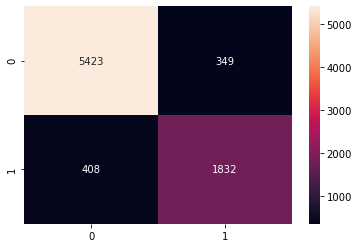

In [213]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Confusion Matrix:")
cf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("Classification Report:")
print(classification_report(y_test,predictions))

#### The model is performing extremely well at predicting whether a person will cancel their reservation or not. The accuracy of the cancellation detection is 84%.

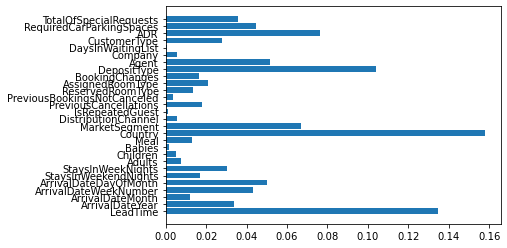

In [244]:
importance = rf.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#    print('%s, Score: %.5f' % (X_train.columns[i],v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(range(len(importance)),X_train.columns)
plt.show()

### We can see that the 5 most important factors to consider when predicting whether a customer will cancel their reservation or not are:
    1. Country they are from
    2. Lead Time
    3. Deposit Type
    4. Average Daily Rate
    5. Market Segment

    

#### With this knowledge, lets see how few factors we can use to still accurately detect the cancellation probability. In the following RandomForestRegressor, I am only using:
- Country
- LeadTime
- DepositType
- Average Daily Rate
#### All of these factors are known at the time of booking, so this regressor would be great for immediatly identifying high-risk bookings. 

In [257]:
X_reduced = X_train[['Country','LeadTime','DepositType','ADR']]
small_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
small_rf.fit(X_reduced, y_train);


Mean Absolute Error:
 0.18
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      5772
         1.0       0.70      0.63      0.66      2240

    accuracy                           0.82      8012
   macro avg       0.78      0.76      0.77      8012
weighted avg       0.82      0.82      0.82      8012



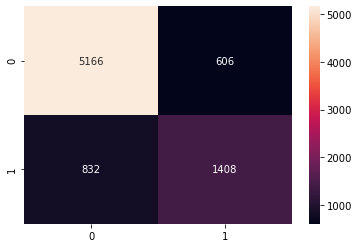

In [261]:
reduced_test = X_test[['Country','LeadTime','DepositType','ADR']]
predictions = small_rf.predict(reduced_test)
predictions = np.round(predictions)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:\n', round(np.mean(errors), 2))

print("Confusion Matrix:")
cf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')
print("Classification Report:")
print(classification_report(y_test,predictions))

## Final Report
#### To the hotel management, 
####     I propose that we improve our capital gains by offering lower rates to people from countries which tend to cancel most often. We could call it a long distance discount. I also suggest that because people who book earlier frequently cancel their bookings, we check in on patrons and send special offers to those who have had their booking for the longest. Another way to combat cancellations is to require a deposit for substantial lead times. This prevents the resort from holding capacity hostage for months only to have the booking cancelled. I also suggest we offer a lower rate or a room type switch to those who attempt to cancel. People love free upgrades and will do anything for them. As we found, some agents are quite effective at user retention. We should offer bonuses to those agents and businesses who have clients who do not cancel. A great way to get more returning customers would be to offer a returning customer discount. 

#### Additionally, Targeting the high-risk clients as identified by the second reducedTree, and offering them specials or calling to show excellent customer service would be a great tool to reduce the number of cancellations. It's crazy how easy it is to predict people's cancellation habits based off of these things! Let's take advantage of it and profit off of it (sounds familiar)!